# Project. 월별/연도별 직종에 따른 취업률 분석

- 연도별 직종에 따른 취업률 분석

- 2015~2019

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

df5= pd.read_csv('고용센터2.csv',engine='python',thousands = ',')
df5.drop([0],inplace=True) #계 삭제
#df5.drop([1],inplace=True)
df5=df5.dropna()
df5=df5.set_index(["직업"]) #단순히 0부터 정수로 되어있는 index를 직업이름으로 바꿔준다.


## 최근 취업률
- 최근의 취업률이 가장 밑에 있는 것으로 보아 취업률이 확실히 낮아지는걸 볼 수 있다.
- 관리직은 매해  감소하고 있다. 

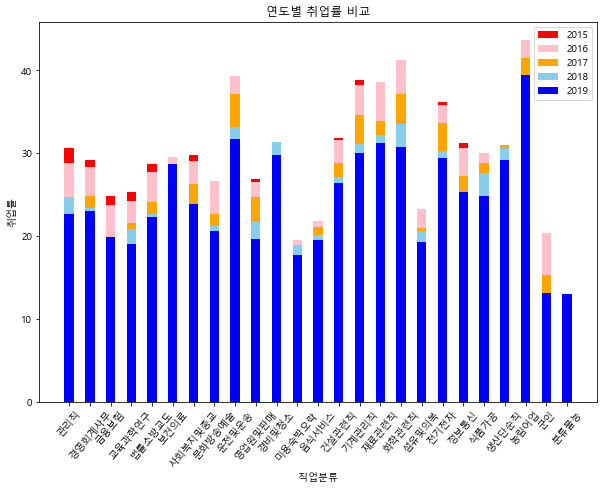

In [2]:
#df5[['2015_취업률','2016_취업률','2017_취업률','2018_취업률','2019_취업률']].plot(kind='barh',stacked=True,fontsize=10)
job_name=df5.index
x=np.arange(len(job_name))
#df5=df5.reset_index()
plt.title('연도별 취업률 비교')
plt.xlabel('직업분류')
plt.ylabel('취업률')
plt.xticks(rotation=50)
plt.bar(job_name,df5['2015_취업률'],label='2015',color='red',width=0.45)
plt.bar(job_name,df5['2016_취업률'],label='2016',color='pink',width=0.45)
plt.bar(job_name,df5['2017_취업률'],label='2017',color='orange',width=0.45)
plt.bar(job_name,df5['2018_취업률'],label='2018',color='skyblue',width=0.45)
plt.bar(job_name,df5['2019_취업률'],label='2019',color='blue',width=0.45)

plt.legend()
fig = plt.gcf()
fig.set_size_inches(10, 7)


# 신규구인 비교
### 신규구인인원:구인신청건에서 모집하는 인원수
-기업에서는 구인인원을 대체적으로 줄이고 있지만 보건의료와 종교는 늘어남.  

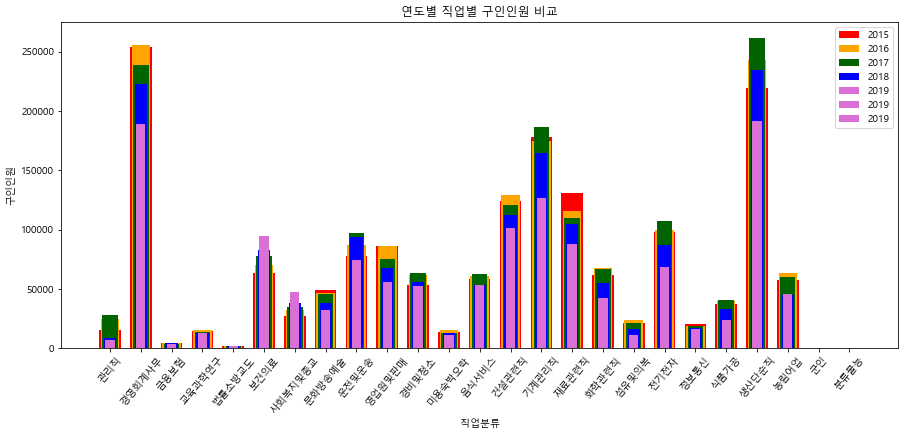

In [3]:
#df5=df5.reset_index()

plt.title('연도별 직업별 구인인원 비교')
plt.xlabel('직업분류')
plt.ylabel('구인인원')
plt.xticks(rotation=50)
plt.bar(job_name, df5['2015_신규구인'],label='2015',color='red',width=0.7)
plt.bar(job_name, df5['2016_신규구인'],label='2016',color='orange',width=0.6)
plt.bar(job_name, df5['2017_신규구인'],label='2017',color='darkgreen',width=0.5)
plt.bar(job_name, df5['2018_신규구인'],label='2018',color='blue', width=0.4)
plt.bar(job_name, df5['2019_신규구인'],label='2019',color='orchid',width=0.3)
plt.bar(job_name, df5['2019_신규구인'],label='2019',color='orchid',width=0.3)
plt.bar(job_name, df5['2019_신규구인'],label='2019',color='orchid',width=0.3)

plt.legend()
fig = plt.gcf()
fig.set_size_inches(15, 6)

# 신규구직 비교
- 대체로 신규구직은 줄거나 그대로 유지하는 반면에 보건의료가 전년도에 비해 11% 증가.
- 기술이 발달해서 사무직보다는 기술직이 인기직종일줄 알았지만 그래프 결과 3% 증가.
- 보건의료 전년도비교 증가율:11%
- 전기전자 전년도비교 증가율:3%

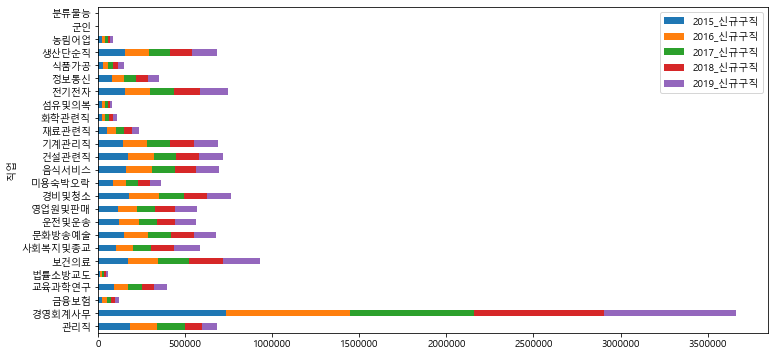

In [4]:
df5[['2015_신규구직','2016_신규구직','2017_신규구직','2018_신규구직','2019_신규구직']].plot.barh(stacked=True,fontsize=10)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(12, 6)

In [5]:
df5=df5.reset_index()

df5_result=df5.loc[5]
df5_result2=df5.loc[18]
increase=df5_result['2019_신규구직']-df5_result['2018_신규구직']
per=increase/df5_result['2018_신규구직'] * 100
print("보건의료 전년도비교 증가율:"+ str(per))

increase2=df5_result2['2019_신규구직']-df5_result2['2018_신규구직']
per2=increase2/df5_result2['2018_신규구직'] * 100
print("전기전자 전년도비교 증가율:"+str(per2))

보건의료 전년도비교 증가율:11.048998916205578
전기전자 전년도비교 증가율:3.390640548892264


### 구인배수=신규구인인원/신규구직건수
### 취업률=취업건수/신규구직건수 x 100

In [6]:
df5=df5.set_index(["직업"]) #단순히 0부터 정수로 되어있는 index를 직업이름으로 바꿔준다.

# 연도별 구인배수 칼럼 추가
df5['2015_구인배수']=df5['2015_신규구인']/df5['2015_신규구직']
df5['2016_구인배수']=df5['2016_신규구인']/df5['2016_신규구직']
df5['2017_구인배수']=df5['2017_신규구인']/df5['2017_신규구직']
df5['2018_구인배수']=df5['2018_신규구인']/df5['2018_신규구직']
df5['2019_구인배수']=df5['2019_신규구인']/df5['2019_신규구직']
#구인배수 열만 추출하기.
multiple=df5[['2015_구인배수','2016_구인배수','2017_구인배수','2018_구인배수','2019_구인배수']]
#분류불능의 결측치 0으로 바꾸기.
multiple=multiple.fillna(value=0)
multiple.head()

,2015_구인배수,2016_구인배수,2017_구인배수,2018_구인배수,2019_구인배수
직업,,,,,
관리직,0.083618,0.162996,0.174145,0.085775,0.085149
경영회계사무,0.344839,0.358486,0.335822,0.298549,0.250040
금융보험,0.176200,0.180995,0.152171,0.175927,0.147317
교육과학연구,0.162677,0.186485,0.165395,0.185073,0.176692
법률소방교도,0.192968,0.177100,0.158934,0.152281,0.134223


## 구인배수 그래프
- 최근들어 구인배수의 수가 감소했다. 그만큼 일자리가 감소한것으로 볼 수 있다.
-  구인배수가 크다: 뽑는인원>취업을원하는사람
- 구인배수가 작다: 뽑는인원<취업을원하는사람

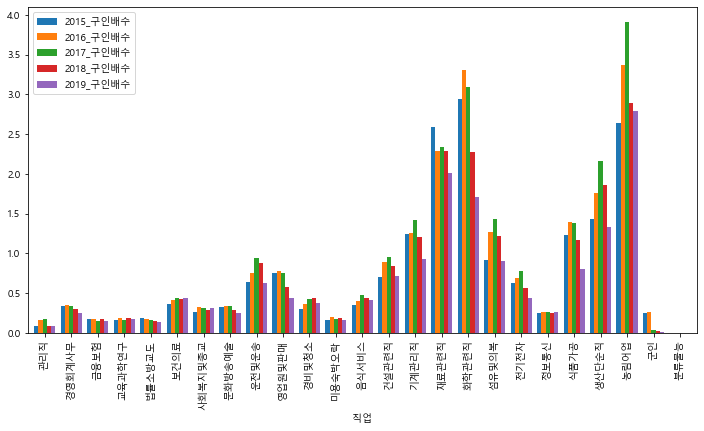

In [7]:
#job_name=df5.index
multiple.plot.bar(width=0.8)
fig = plt.gcf()
fig.set_size_inches(12, 6)

## [ 신규 구인 수 ]
### 1. 매년 4월  (2016-2019)과 코로나 이후 (2020.01-2020.04) 신규 구인 수  비교
- 데이터 분석 결과 2017년 04월의 신규 구인 수가 가장 높았고 갈수록 감소하는 추세이다.
- 코로나 바이러스 이후 2020년 4월에는 신규 구인 수가 최저인 것으로 보인다.


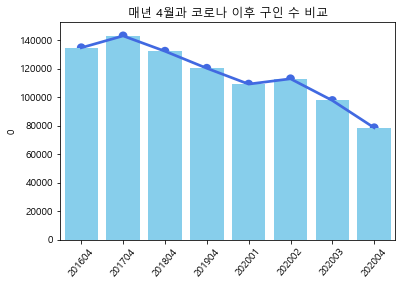

In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('covid.csv', encoding='cp949',header=1)
row = df.loc[0] # 신규구인 달마다 뽑아오기 
row_data = row.loc[['신규구인_201604','신규구인_201704','신규구인_201804','신규구인_201904',
                    '신규구인_202001','신규구인_202002','신규구인_202003','신규구인_202004']]

# 1) 총 계만 남기고 분석 => 2016 2017 2018 2019) 4월, 2020) 1월~ 4월 연도 총계로 분석하기
plt.rc('font', family ='Malgun Gothic')
plt.title('매년 4월과 코로나 이후 구인 수 비교')
year = ['201604','201704','201804','201904','202001','202002','202003','202004']
plt.xticks(range(8),year)
plt.xticks(rotation=50)
plt.bar(year,row_data,color='skyblue')
sns.pointplot(year,row_data,color='royalblue')
plt.show()


### 2. 코로나 이후 4월이 최저 신규 구인 수를 보이기 때문에 전년도 4월과 비교하여 파이차트로 시각화 하였다.


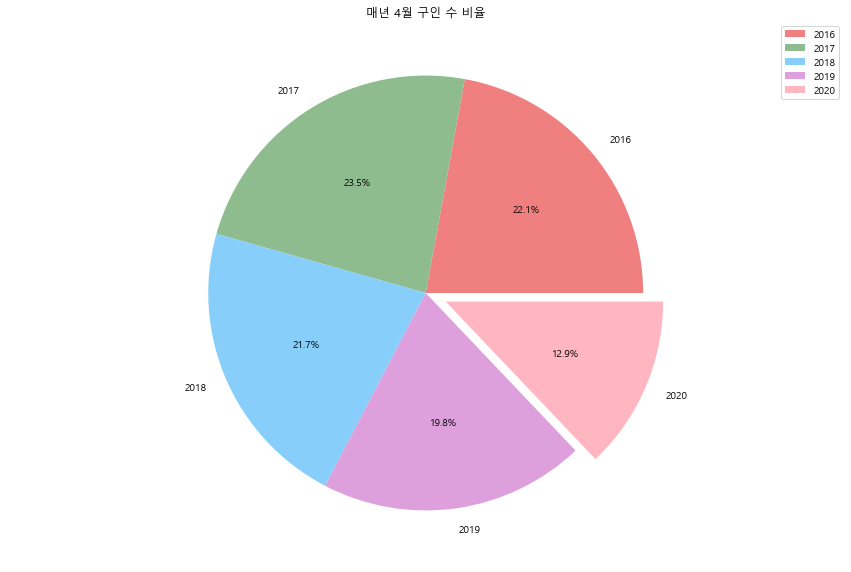

In [9]:
# 2) 파이그래프로 나타내기 (매년 4월만 분석 )
pie_data = row.loc[['신규구인_201604','신규구인_201704','신규구인_201804','신규구인_201904','신규구인_202004']]
pie_year = ['2016','2017','2018','2019','2020']
plt.rc('font', family = 'Malgun Gothic')
plt.axis('equal')
plt.title('매년 4월 구인 수 비율')
color = ['lightcoral', 'darkseagreen', 'lightskyblue', 'plum','lightpink']
plt.pie(pie_data, labels = pie_year, autopct = '%.1f%%',explode = (0,0,0,0,0.1),colors=color)   # 비율 및 범례 추가
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()


## [ 취업률 ]
### 1. 매년 4월  (2016-2019) 과 코로나 이후 (2020.01-2020.04) 취업률 비교
- 취업률로만 201604~202004를 보면 단지 경제성장에 따라서 꾸준히 감소하는 것으로만 보인다. 

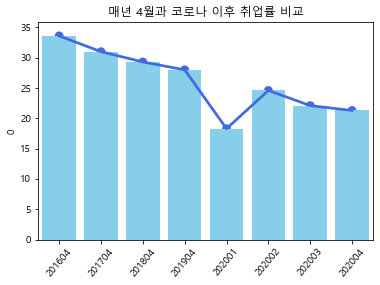

In [10]:
row = df.loc[0] 
row_data2 = row.loc[['취업률_201604','취업률_201704','취업률_201804','취업률_201904','취업률_202001','취업률_202002','취업률_202003','취업률_202004']]

plt.rc('font', family ='Malgun Gothic')
plt.title('매년 4월과 코로나 이후 취업률 비교')
year = ['201604','201704','201804','201904','202001','202002','202003','202004']
plt.xticks(range(8),year)
plt.xticks(rotation=50)
plt.bar(year,row_data2,color='skyblue')
sns.pointplot(year,row_data2,color='royalblue')
plt.show()


#### 위의 1월을 좀 더 확실하게 비교해보기 위해
- 1월의 취업률은 다른 월보다 낮기 때문에 위의 4월 비교에서 유독 낮게 나온 것이다.

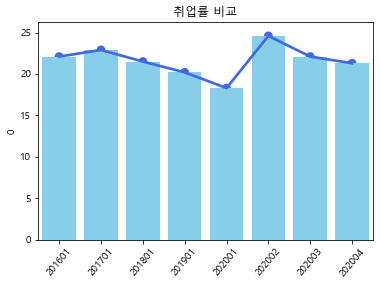

In [11]:
row = df.loc[0] 
row_data3 = row.loc[['취업률_201601','취업률_201701','취업률_201801','취업률_201901','취업률_202001','취업률_202002','취업률_202003','취업률_202004']]

plt.rc('font', family ='Malgun Gothic')
plt.title('취업률 비교')
year = ['201601','201701','201801','201901','202001','202002','202003','202004']
plt.xticks(range(8),year)
plt.xticks(rotation=50)
plt.bar(year,row_data3,color='skyblue')
sns.pointplot(year,row_data3,color='royalblue')
plt.show()


### 상반기3월 취업률을 확인해본다.

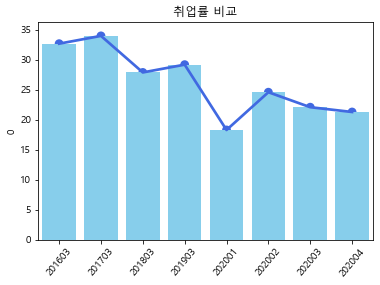

In [12]:
row = df.loc[0] 
row_data4 = row.loc[['취업률_201603','취업률_201703','취업률_201803','취업률_201903','취업률_202001','취업률_202002','취업률_202003','취업률_202004']]

plt.rc('font', family ='Malgun Gothic')
plt.title('취업률 비교')
year = ['201603','201703','201803','201903','202001','202002','202003','202004']
plt.xticks(range(8),year)
plt.xticks(rotation=50)
plt.bar(year,row_data4,color='skyblue')
sns.pointplot(year,row_data4,color='royalblue')
plt.show()


### 취업률은 신규구직건수와 관계가 높기 때문에 신규구직건수 확인.

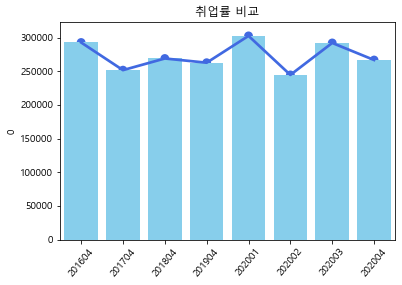

In [13]:
row = df.loc[0] 
row_data4 = row.loc[['신규구직건수_201603','신규구직건수_201703','신규구직건수_201803','신규구직건수_201903',
                     '신규구직건수_202001','신규구직건수_202002','신규구직건수_202003','신규구직건수_202004']]

plt.rc('font', family ='Malgun Gothic')
plt.title('취업률 비교')
year = ['201604','201704','201804','201904','202001','202002','202003','202004']
plt.xticks(range(8),year)
plt.xticks(rotation=50)
plt.bar(year,row_data4,color='skyblue')
sns.pointplot(year,row_data4,color='royalblue')
plt.show()


### 2. 바이러스 2종(신종플루, 메르스)와 코로나 비교 분석 

### >> 신종플루와 메르스의 매년 취업률 비교


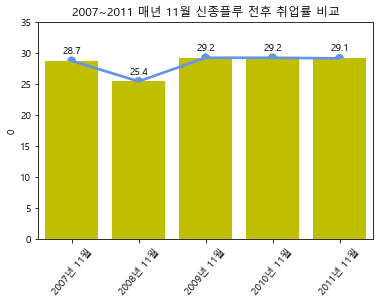

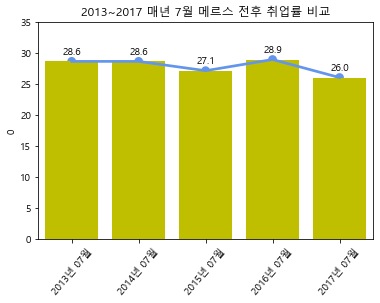

In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df2 = pd.read_csv('influenza2.csv', encoding='cp949',header=1)
row = df2.loc[0] # 신규구인 달마다 뽑아오기
row_data = row.loc[['취업률_200711','취업률_200811','취업률_200911','취업률_201011','취업률_201111']].astype('float')
plt.rc('font', family ='Malgun Gothic')
plt.title('2007~2011 매년 11월 신종플루 전후 취업률 비교')
year = ['2007년 11월','2008년 11월','2009년 11월','2010년 11월','2011년 11월']
plt.xticks(range(5),year)
plt.xticks(rotation=50)
bar_width=0.35
bar=plt.bar(year,row_data,color='y')
for rect in bar :
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()*0.5, height*1.03, '%.1f' % height, ha='center', va='bottom')
sns.pointplot(year,row_data,color='cornflowerblue')
plt.ylim(0, 35)
plt.show()

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df2 = pd.read_csv('mers2.csv', encoding='cp949',header=1)
row = df2.loc[0] # 신규구인 달마다 뽑아오기
row_data = row.loc[['취업률_201307','취업률_201407','취업률_201507','취업률_201607','취업률_201707']].astype('float')
plt.rc('font', family ='Malgun Gothic')
plt.title('2013~2017 매년 7월 메르스 전후 취업률 비교')
year = ['2013년 07월','2014년 07월','2015년 07월','2016년 07월','2017년 07월']
plt.xticks(range(5),year)
plt.xticks(rotation=50)
bar_width=0.35
bar=plt.bar(year,row_data,color='y')
for rect in bar :
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()*0.5, height*1.03, '%.1f' % height, ha='center', va='bottom')
sns.pointplot(year,row_data,color='cornflowerblue')
plt.ylim(0, 35)
plt.show()

## >> 신종플루, 메르스 그리고 코로나의 평균 취업률 분석
### : 신종플루, 메르스, 코로나 바이러스 각각의 기간동안의 취업률 평균을 비교 분석해본 결과 메르스의 평균 취업률이 가장 높았고, 그 다음은 신종플루, 그 다음은 코로나 바이러스이다. 
### 코로나 바이러스 기간 동안의 취업률이 가장 낮은 것은 확인 할 수 있다.


C:\anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\anaconda\lib\site-packages\ipykernel_launcher.py:26: Setting

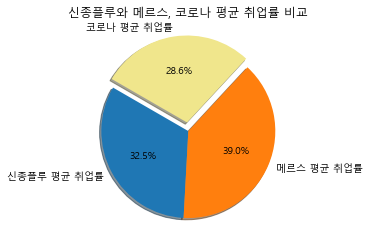

In [15]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from matplotlib import rcParams
from matplotlib import font_manager, rc
from matplotlib import style
job_data = pd.read_csv('data.csv',encoding='cp949')#, index_col='직업'
job_data_a=job_data.loc[0]
data = job_data_a.loc[['2009_04취업률','2009_05취업률','2009_06취업률','2009_07취업률',
                       '2009_08취업률','2009_09취업률','2009_10취업률','2009_11취업률',
                       '2009_12취업률','2010_01취업률','2010_02취업률','2010_03취업률']]

job_data_a['신종플루 평균 취업률']=int(round(data.sum()/len(data)))

data2 = job_data_a.loc[['2015_05취업률','2015_06취업률','2015_07취업률',
                             '2015_08취업률','2015_09취업률','2015_10취업률',
                             '2015_11취업률','2015_12취업률']]

job_data_a['메르스 평균 취업률']=int(round(data2.sum()/len(data2)))

data3 = job_data_a.loc[['2020_01취업률','2020_02취업률','2020_03취업률','2020_04취업률']]

job_data_a['코로나 평균 취업률']=int(round(data3.sum()/len(data3)))

a = job_data_a.loc[["신종플루 평균 취업률","메르스 평균 취업률","코로나 평균 취업률"]]
b = ['신종플루 평균 취업률','메르스 평균 취업률','코로나 평균 취업률']
colors = ["#1f77b4", "#ff7f0e","khaki"]
plt.title('신종플루와 메르스, 코로나 평균 취업률 비교')
explode = (0, 0, 0.1)
plt.pie(a, labels=b, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
plt.show()

## [직종]
### 직업별 2016년 4월과 2020년 4월을 비교하여 감소/증가한 직업에 대해 분석하였다.
- 코로나 바이러스 전과 후를 비교하기 위해 4월 데이터로 분석하였다.
- 군인은 구인 인원이 다른 직종에 비해 많지 않아 그래프에 나타내기 어렵다.
- 2016년 4월과 비교했을 때 2020년 4월은 대체적으로 구인 인원이 줄어들었다. 
- 구인 인원이 감소하지 않은 직업군은 `보건의료, 사회복지 종교` 이다 .
- 구인 인원이 크게 감소한 직업은 `미용 및 숙박 오락, 섬유 및 의복, 관리직`으로 볼 수 있다. 
- 그래프에서 분홍색 막대와 하늘색 막대의 비율 차이가 가장 많이나는 `섬유 및 의복` 분야는 구인 인원이 가장 크게 감소한 것으로 볼 수 있다. 이는 코로나로 인한 '집콕 생활'로 사람들의 패션 소비가 줄어들면서 발생한 것으로 보인다.

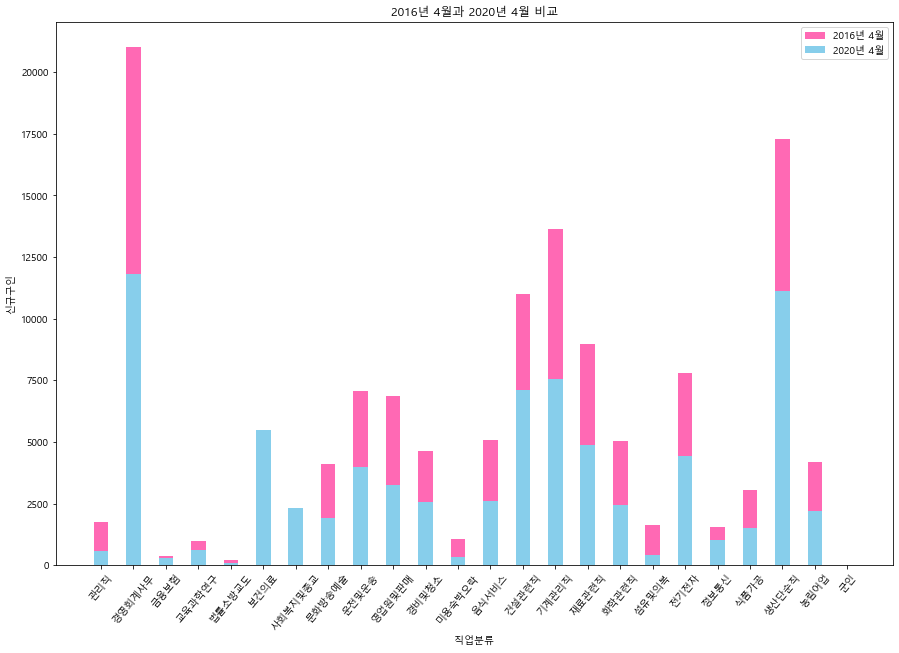

In [16]:
# 3) 직업별 코로나 이후 감소한 직업군 
result_2 = df[1:] # 계 삭제
result_2 = result_2.reset_index(drop=True,inplace=False) # 인덱스 바꿔주기
xticks = result_2['직업분류']
x = np.arange(len(xticks))
plt.title('2016년 4월과 2020년 4월 비교')
plt.xlabel('직업분류')
plt.ylabel('신규구인')
plt.xticks(rotation=50)
plt.bar(xticks, result_2['신규구인_201604'],label='2016년 4월',color='hotpink',width=0.45)
plt.bar(xticks, result_2['신규구인_202004'],label='2020년 4월',color='skyblue',width=0.45)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()


# 다중선형회귀 분석
### 1. 데이터 불러오기
### 2. 데이터 세트 분리하기 (Training , Test) 8:2 
### 3. 모델 생성하기 
### 4. 모델의 정확도 평가하기


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
from sklearn.metrics import mean_squared_error
get_ipython().run_line_magic('matplotlib', 'inline')
matplotlib.style.use('ggplot')
matplotlib.rcParams['axes.unicode_minus']=False
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

df= pd.read_csv('job_data.csv', engine='python',thousands=',')

X = df[['구인', '구직','취업자수']]
y = df[['취업률']]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)



a value =  [22.85550319]
b value =  [[-2.80883535e-06 -1.11210466e-04  4.86781598e-04]]


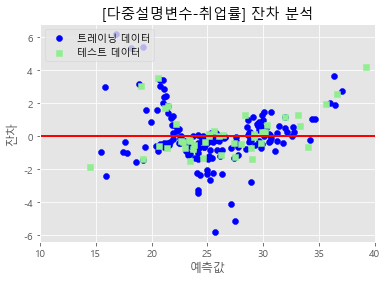

In [18]:
mlr = linear_model.LinearRegression()
mlr.fit(X_train,y_train)

print('a value = ', mlr.intercept_)
print('b value = ', mlr.coef_) #3개의 변수를 사용해서 3개가 나옴.
y_train_predict = mlr.predict(X_train)
y_predict = mlr.predict(X_test)
#예측값과 잔차 분석
#회귀모델의 적합도는 예측값게 0이 가까울수록 좋다.
plt.scatter(y_train_predict , y_train_predict - y_train, c='blue',marker='o', label = '트레이닝 데이터')
plt.scatter(y_predict, y_predict - y_test, c='lightgreen', marker='s', label='테스트 데이터')
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.hlines(y=0,xmin=10,xmax=40,lw=2,color='red')
plt.xlim([10,40])
plt.title('[다중설명변수-취업률] 잔차 분석')
plt.legend(loc=2)
plt.show()

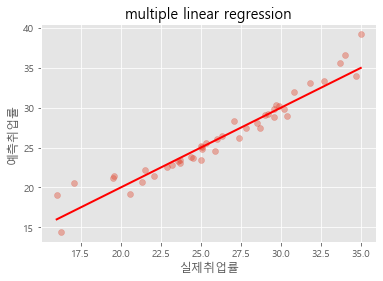

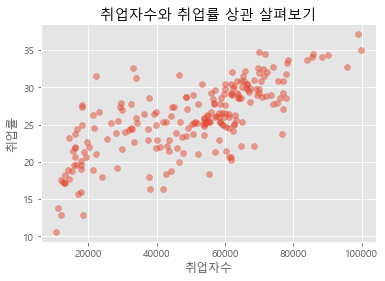

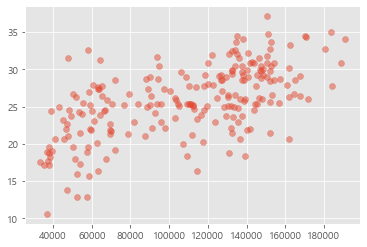

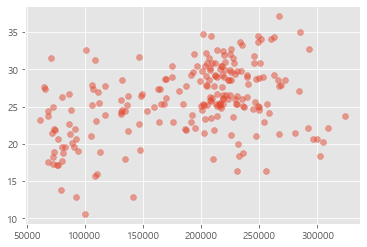

In [19]:
#실제 테스트 값과 예측값 분석.
plt.scatter(y_test,y_predict,alpha=0.4)
x_line=[y_test.min(), y_test.max()]
y_line=[y_test.min(), y_test.max()]

plt.plot(x_line, y_line, 'r', lw=2)
plt.xlabel("실제취업률")
plt.ylabel("예측취업률")
plt.title("multiple linear regression")
plt.show()


#상관 살펴보기
#취업자수와 취업률
plt.title("취업자수와 취업률 상관 살펴보기")
plt.scatter(df[['취업자수']],df[['취업률']],alpha=0.5)
plt.xlabel("취업자수")
plt.ylabel("취업률")
plt.show()
#구인과 취업률
plt.scatter(df[['구인']],df[['취업률']],alpha=0.5)
plt.show()
#구직과 취업률
plt.scatter(df[['구직']],df[['취업률']],alpha=0.5)
plt.show()
# 그래프 3개를 본 결과 3개의 변수 중에서 취업자수와 취업률이 상관있어보인다.



In [20]:
#구인 구직 취업자수 값을 넣어줘서 취업률을 예측해본다.
predict_202005=[[55000,230000,45000]] 
my_predict=mlr.predict(predict_202005)
print(my_predict)

[[19.02778194]]


In [21]:

#모델의 정확도 평가
#rss(residual sum of square)는 직선이 미처 y에 대해 설명하지 못한 변화량을 의미
#R^2가 클수록 실제값과 예측값이 유사함을 의미하며 데이터를 잘 설명한다.
residuals = y_test - y_predict
residuals.describe()

SSE = (residuals**2).sum() #오차제곱의합
SST = ((y_test-y_test.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse_train = mean_squared_error(y_train,y_train_predict)
mse_test = mean_squared_error(y_test,y_predict)
print('MSE-train data: %.2f, test data: %.2f' %(mse_train,mse_test))
r2_train = r2_score(y_train,y_train_predict)
r2_test = r2_score(y_test,y_predict)
print('R2-train data: %.2f, test data: %.2f' %(r2_train,r2_test))
#test data의 mse가 train data의 mse보다 작게나왔다. 오버피팅되어 있지는 않음.
# test data > train data : overfitting

print('score = ', mlr.score(X_test, y_test))
print('Mean_Squared_Error = ', mean_squared_error(y_predict, y_test)) #손실
print('RMSE = ', mean_squared_error(y_predict, y_test)**0.5) #평균제곱근오차



R_squared =  취업률    0.919097
dtype: float64
MSE-train data: 2.55, test data: 1.83
R2-train data: 0.89, test data: 0.92
score =  0.9190973174297102
Mean_Squared_Error =  1.8323333489484086
RMSE =  1.353637081698196
